# TP2: Linear Regression

*By Daniel Jorge Deutsch*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(font_scale=1.5)

# Exercise 1.1

In [3]:
# Load the data and order the dataframe columns
df = pd.read_csv("./datasets/data_tp_2.csv")
df = df.reindex(sorted(df.columns, key=lambda x: (len(x), x.lower())), axis=1)

In [4]:
# Separates the df into input (X) and output (Y) matrices
X = df[[col for col in df.columns if col.startswith("X")]].values
Y = df[[col for col in df.columns if col.startswith("Y")]].values

# Obtains the dimensions of X
n, p = X.shape

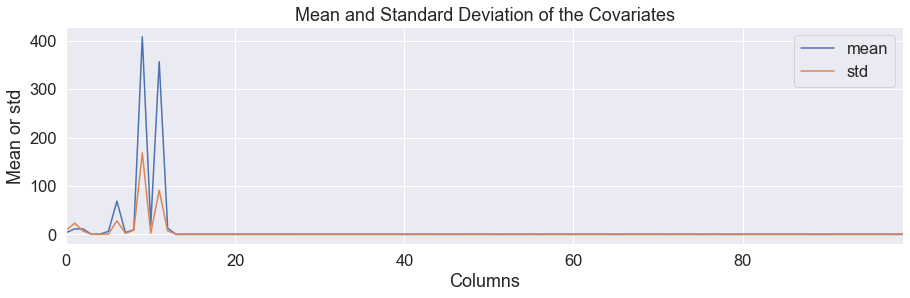

In [5]:
# Plot the mean and standard deviation of the covariates
plt.figure(figsize=(15, 4))
plt.plot(X.mean(axis=0), label="mean")
plt.plot(X.std(axis=0), label="std")
plt.xlim(0, p-1)
plt.title("Mean and Standard Deviation of the Covariates")
plt.xlabel("Columns")
plt.ylabel("Mean or std")
plt.legend()
plt.show()

As one can see from the plot above, the data is **not centered** since $E[X_i] \neq 0$. We can also notice that the data is **not normalized** since $\sigma_i \neq 1$.** FALTA FALAR STANDARDIZEDDDDDDDD**

In [6]:
# Separate the covariate data in train and test sets (test should be 25% of total)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

print(f"Size of the training set: {X_train.shape[0]}")
print(f"Size of the test set: {X_test.shape[0]}")

Size of the training set: 379
Size of the test set: 127


In [7]:
# Center and standarize the train and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

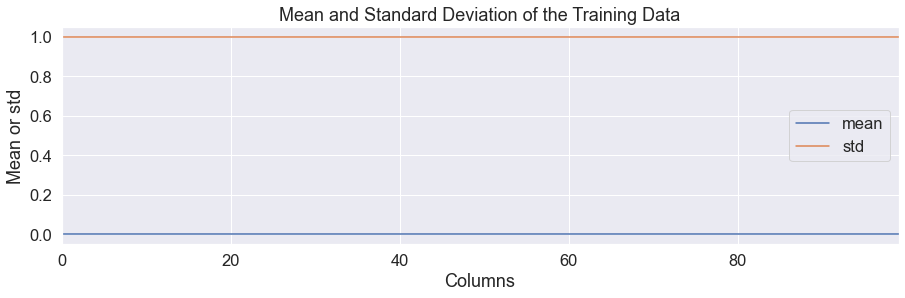

In [8]:
# Plot the mean and standard deviation of the trainig data
plt.figure(figsize=(15, 4))
plt.plot(X_train.mean(axis=0), label="mean")
plt.plot(X_train.std(axis=0), label="std")
plt.xlim(0, p-1)
plt.title("Mean and Standard Deviation of the Training Data")
plt.xlabel("Columns")
plt.ylabel("Mean or std")
plt.legend()
plt.show()

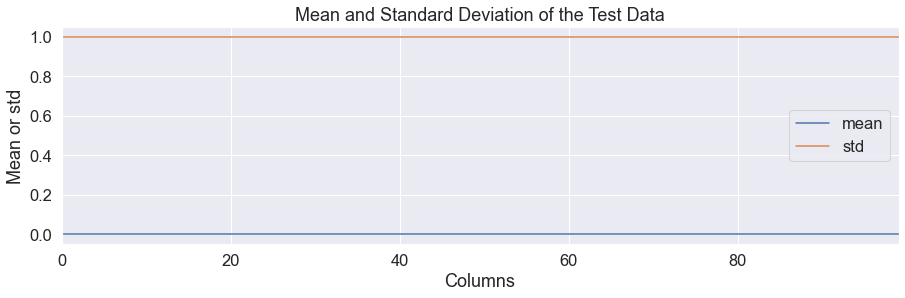

In [9]:
# Plot the mean and standard deviation of the test data
plt.figure(figsize=(15, 4))
plt.plot(X_test.mean(axis=0), label="mean")
plt.plot(X_test.std(axis=0), label="std")
plt.xlim(0, p-1)
plt.title("Mean and Standard Deviation of the Test Data")
plt.xlabel("Columns")
plt.ylabel("Mean or std")
plt.legend()
plt.show()

In [10]:
# Create empty DataFrames
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

# Exercise 1.2 

In [11]:
def R2(Y_test, Y_test_pred):
    y_mean = np.ones((len(Y_test), 1)) * Y_test.mean()
    RSS = np.linalg.norm(Y_test_pred-Y_test)**2
    TSS = np.linalg.norm(Y_test-y_mean)**2
    r2 = 1 - RSS/TSS
    return r2


def MSE(Y_test, Y_test_pred):    
    mse = ( (Y_test_pred-Y_test)**2 ).mean(axis=0)[0]
    return mse

# Exercise 1.3

In [12]:
# Creates a model with the training data
model = LinearRegression()            # Creates the model
model = model.fit(X_train, Y_train)   # Trains the model

# Predicts Y_test using the model and X_test as input
Y_test_pred = model.predict(X_test)

# Adds column OLS to df_test with the predicted values
df_test['OLS'] = Y_test_pred.flatten()

# Adds column OLS to df_coef with the estimated coefficients
df_coef['OLS'] = model.coef_.flatten()

# Obtains the R^2 and the mse of the test data
r2 = R2(Y_test, Y_test_pred)
mse = MSE(Y_test, Y_test_pred)

print(f"For the test data we have: R^2={r2:.3f} and MSE={mse:.3f}")

For the test data we have: R^2=0.539 and MSE=46.003


# Exercise 1.4

In [13]:
# Obtains covariance matrix
cov_matrix = np.cov(X_train.T)

# Compute Singular Value Decomposition (SVD) of the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)

# Plot Heatmap of the covariance matrix
# plt.figure(figsize=(10, 10))
# hm = sns.heatmap(
#     cov_matrix,
#     cbar = True,
#     annot = True,
#     square = True,
#     fmt = '.2f',
#     annot_kws = { 'size': 12 }
# )
# plt.title("Covariance Matrix Heatmap")
# plt.tight_layout()
# plt.show()

# Exercise 1.5

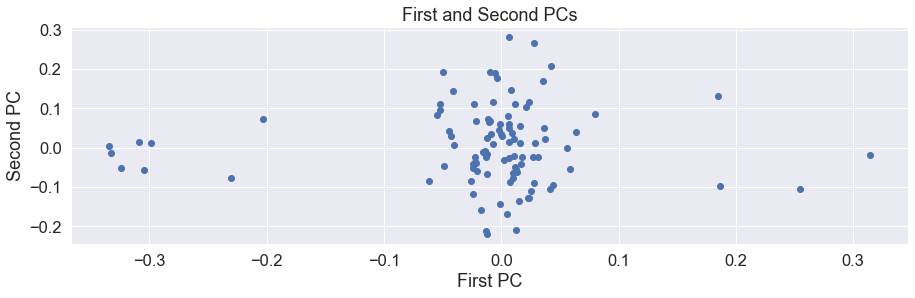

In [19]:
# Plot the first and second PCs
plt.figure(figsize=(15, 4))
plt.scatter(U[:, 0], U[:, 1])
plt.title("First and Second PCs")
plt.xlabel("First PC")
plt.ylabel("Second PC")
plt.show()

# Exercise 1.6

In [15]:
# Compute projected data for both train and test data
X_train_proj = X_train @ U[:, :2]
X_test_proj = X_test @ U[:, :2]

# Creates a model with the projected training data
model = LinearRegression()                 # Creates the model
model = model.fit(X_train_proj, Y_train)   # Trains the model

# Predicts Y_test using the model and X_test_proj as input
Y_test_pred = model.predict(X_test_proj)

# Adds column pcs_ols to df_test with the predicted values
df_test['pcs_ols'] = Y_test_pred.flatten()

# Obtains the R^2 and the mse of the test data
r2 = R2(Y_test, Y_test_pred)
mse = MSE(Y_test, Y_test_pred)

print(f"For the projected test data we have: R^2={r2:.3f} and MSE={mse:.3f}")

For the projected test data we have: R^2=0.198 and MSE=79.964


# Exercise 1.7

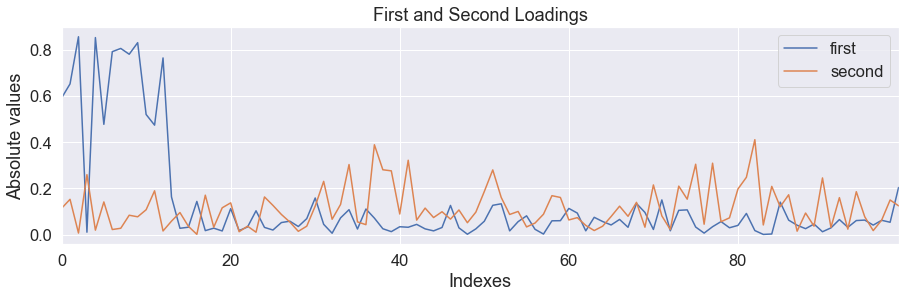

In [17]:
# Compute the absolute values of the loadings on the first two PC
loadings = np.abs(U[:, :2] * np.sqrt(s[:2]))

# Plot the absolute values of the loadings on the first two PC
plt.figure(figsize=(15, 4))
plt.plot(loadings[:, 0], label="first")
plt.plot(loadings[:, 1], label="second")
plt.xlim(0, p-1)
plt.title("First and Second Loadings")
plt.xlabel("Indexes")
plt.ylabel("Absolute values")
plt.legend()
plt.show()

# Exercise 1.8

In [25]:
# Creates a model with the training data
model = LassoCV(n_alphas=30, alphas=np.logspace(-3, 1, 30))   # Creates the model
model = model.fit(X_train, Y_train)                           # Trains the model

# Predicts Y_test using the model and X_test as input
Y_test_pred = model.predict(X_test)

# Obtains the R^2 and the mse of the test data
r2 = R2(Y_test, Y_test_pred)
mse = MSE(Y_test, Y_test_pred)

print(f"For the projected test data we have: R^2={r2:.3f} and MSE={mse:.3f}")

For the projected test data we have: R^2=-203.960 and MSE=101.088


# Exercise 1.9

In [24]:
np.logspace(-3, 1, 30)

array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])

# Exercise 1.10

# Exercise 1.11

# Exercise 1.12

# Exercise 1.13

# Exercise 1.14

# Exercise 1.15

# TEACHER RESULTS

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
a = [0.27144357, 0.10904428, 0.54290997, 0.59290068]
b = [0.606743,   0.28013509, 0.12896232, 0.39630819]
print(R2(a,b))
print(MSE(a,b))
-8.726169745534376
0.20272826830599044

R2 0.6375017809905552
MSE 32.50958869608681

SyntaxError: invalid syntax (<ipython-input-15-e3f01e3c2a70>, line 8)